# Liability-Driven Investing 

There's a dual focus in investment management, one is 'greed' and the other is 'fear'. When you're an asset owner you know that you need 'greed' or as we more commonly know it as 'performance', we need this to make sure we are able to finance our liabilities without any or much contribution from stakeholders. However, as an asset owner you are also driven by 'fear' which is the concernt that the value of your assets, even thought you're trying to increase value, actually go down in value. The objective is to increase the funding ratio and the concern is a big sharp decrease in the funding ratio value. These objectives are conflicting with one another, the point is to not try and create a portfolio which does everything because in turn it will be good at nothing. We have reason to believe that these conflicting objectives in investment management are best managed when they are managed separately. So, we will advocate for two portfolios, the first is a performance-seeking portfolio (PSP), focussed on diversification, and efficient acess to risk premia. The second portfolio is the liability-hedging portfolio (LHP), focussed on hedging the impact of risk factors in liabilities.

### Formal Liability-Driven Investing (LDI) Model

The formal expression for an optimal allocation strategy is given by the folowing:

$$\mathop{\mathrm{max}}E\left[u\left(\frac{A_T}{L_T}\right)\right] \Rightarrow w^* = \frac{\lambda_{PSP}}{\lambda\sigma_{PSP}}w^{PSP} + \beta_{L, LHP}\left(1-\frac{1}{\gamma}\right)w^{LHP}.$$

This equation shows that for one to have the maximum asset value to liability value ratio one must hold two portfolios given by $w^{PSP}$ and $w^{LHP}.$ The PSP focusses on maximising the sharpe ratio and the LHP focusses on liability risk hedging.

### Greeks of Liability-Driven Investing

$$\lambda_{PSP} \text{ is the PSP Sharpe ratio}\colon\lambda=0\Rightarrow\text{no investment in PSP}$$

$$\beta_{LHP} \text{ is the beta of liabilities w.r.t LHP}\colon \beta = 0\Rightarrow \text{no investment in LHP}$$

$$\sigma_{PSP} \text{ is the PSP volatility}\colon\sigma=\infty\Rightarrow\text{no investment in PSP}$$

$$\gamma \text{ is the risk-aversion}\colon\gamma=\infty\Rightarrow\text{no investment in PSP}$$


# Lab Session - Liability-Driven Investing

## GHP Construction with Duration Matching

In [1]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk    
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2

In [3]:
erk.bond_cash_flows(3, 100, 0.03, 2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [4]:
erk.bond_price(20, 1000, 0.05, 2, 0.04)

1136.7773962036904

In [5]:
erk.bond_price(20, 1000, 0.05, 2, 0.05)

1000.0000000000023

In [6]:
erk.bond_price(20, 1000, 0.05, 2, 0.02)

1492.520291709342

In [7]:
rates = np.linspace(0.01, 0.10, 20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [8]:
prices = [erk.bond_price(10, 1000, 0.05, 2, rate) for rate in rates]
prices

[1379.7483829333992,
 1326.7629283179222,
 1276.1632981372743,
 1227.833537616068,
 1181.6636507727876,
 1137.5492793724407,
 1095.3913999300185,
 1055.0960377089511,
 1016.5739967228162,
 979.7406048086303,
 944.5154728963505,
 910.8222676519945,
 878.5884967212596,
 847.74530584692,
 818.2272871767957,
 789.9722981198867,
 762.9212901465673,
 737.0181469646424,
 712.209531536784,
 688.4447414365]

<AxesSubplot:title={'center':'Price of 10 year Bond with Different Interest Rates'}>

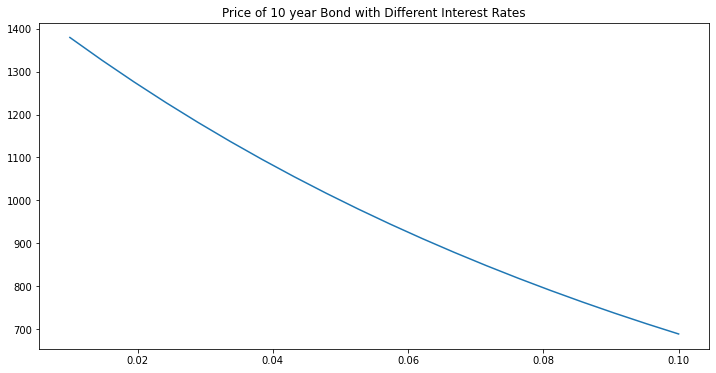

In [10]:
pd.DataFrame(data = prices, index = rates).plot(title = 'Price of 10 year Bond with Different Interest Rates', legend = False, figsize=(12,6))

In [11]:
cf = erk.bond_cash_flows(3, 1000, 0.06, 2)

In [12]:
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [14]:
discounts = erk.discount(cf.index, 0.06/2)
discounts

Float64Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531595,
              0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
             dtype='float64')

In [15]:
dcf = discounts * cf
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [18]:
weights = dcf/dcf.sum()
weights

1    0.029126
2    0.028278
3    0.027454
4    0.026655
5    0.025878
6    0.862609
dtype: float64

In [20]:
(cf.index*weights).sum()

5.579707187194534

In [21]:
erk.macaulay_duration(cf, 0.06/2)

5.579707187194534

In [22]:
erk.macaulay_duration(erk.bond_cash_flows(3, 1000, 0.06, 2), 0.06/2)

5.579707187194534

### Duration Matching

In [23]:
liabilities = pd.Series(data = [100_000, 100_000], index = [10, 12])
erk.macaulay_duration(liabilities, 0.04)

10.960799385088393

In [24]:
md_10 = erk.macaulay_duration(erk.bond_cash_flows(10, 1000, 0.05, 1), 0.04)
md_20 = erk.macaulay_duration(erk.bond_cash_flows(20, 1000, 0.05, 1), 0.04)

In [25]:
md_10, md_20

(8.190898824083233, 13.544718122145921)

In our case, the fraction in the short duration asset $w_s$, should be such that:

$$w_s \times 8.19+(1-w_s)\times13.54 = 10.96,$$

more generally

$$w_sd_s + (1-w_s)d_l = d_t,$$

rearranging gives:

$$w_s = \frac{d_l - d_t}{d_l-d_s}.$$


In [26]:
short_bond = erk.bond_cash_flows(10, 1000, 0.05, 1)
long_bond = erk.bond_cash_flows(20, 1000, 0.05, 1)
w_s = erk.match_duration(liabilities, short_bond, long_bond, 0.04)
w_s

0.48263092069478974

In [28]:
p_short = erk.bond_price(10, 1000, 0.05, 1, 0.04)
p_long = erk.bond_price(20, 1000, 0.05, 1, 0.04)
a_0 = 130_000
p_flows = pd.concat([a_0*w_s*short_bond/p_short, a_0*(1-w_s)*long_bond/p_long])
erk.macaulay_duration(p_flows, 0.04)

10.960799385088393

In [29]:
erk.macaulay_duration(liabilities, 0.04)

10.960799385088393

In [31]:
cfr = erk.funding_ratio(p_flows, liabilities, 0.04)
cfr     

0.9998760012192478

In [32]:
cfr

0.9998760012192478

In [35]:
rates = np.linspace(0, 0.1, 20)
lb_assets = a_0*long_bond/p_long
sb_assets = a_0*short_bond/p_short

fr_change = pd.DataFrame({
    'Long Bond': [erk.funding_ratio(lb_assets, liabilities, r) for r in rates],
    'Short Bond': [erk.funding_ratio(sb_assets, liabilities, r) for r in rates],
    'Duration Matched Bonds': [erk.funding_ratio(p_flows, liabilities, r) for r in rates]
},
index = rates)

<AxesSubplot:title={'center':'Funding Ratios with changes in Interest Rates'}>

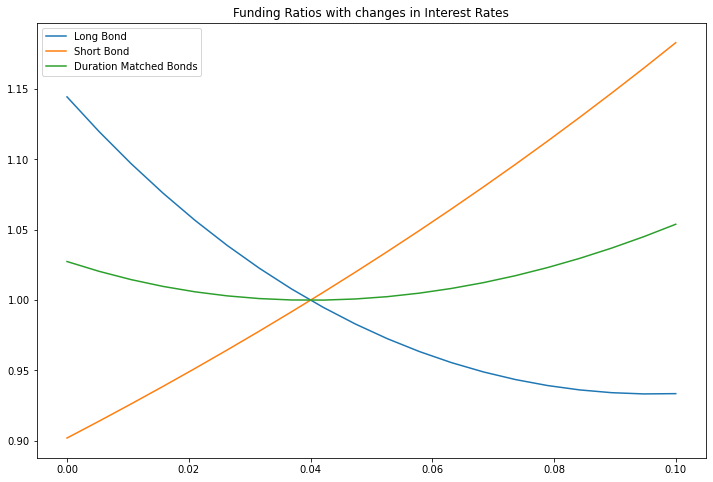

In [36]:
fr_change.plot(title = 'Funding Ratios with changes in Interest Rates', figsize=(12,8))